In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import shap

In [4]:
df = pd.read_csv('/home/tteofili/Downloads/SBAnational.csv')
df.head()

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
target = 'MIS_Status'

money_columns = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']

le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if column_name not in money_columns and df[column_name].dtype == object and column_name != target:
        df[column_name] = le.fit_transform(df[column_name].astype(str))

for c in money_columns:
    df[c] = df[c].replace('\$|,','', regex=True).replace('\(','-', regex=True).replace('\)','', regex=True)
    pd.to_numeric(df[c])

df[target] = le.fit_transform(df[target].astype(str))
    
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,12791,8558,15,47711,2143,38,451120,6591,34,...,12,7,6448,5666,60000.00,0.00,1,0.00,60000.00,48000.00
1,1000024006,405593,19588,15,46526,132,18,722410,6591,34,...,12,7,6448,6838,40000.00,0.00,1,0.00,40000.00,32000.00
2,1000034009,759976,2206,15,47401,2859,18,621210,6591,34,...,12,4,6448,6706,287000.00,0.00,1,0.00,287000.00,215250.00
3,1000044001,83888,2720,36,74012,25,39,0,6591,34,...,12,7,6448,6513,35000.00,0.00,1,0.00,35000.00,28000.00
4,1000054004,38543,21134,9,32801,2683,11,0,6591,34,...,12,4,6448,1667,229000.00,0.00,1,0.00,229000.00,229000.00


In [6]:
Y = df[target]
X = df.drop(columns=[target])

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

[8.62654831e-03 1.62978242e-05 1.49612883e-05 8.85216051e-06
 1.93023163e-04 1.70698312e-03 2.14707055e-04 6.11855988e-04
 1.35950587e-05 1.62576717e-02 5.50259119e-02 5.13844927e-04
 4.19127147e-04 2.95242143e-05 1.62611282e-03 7.43401856e-03
 2.58935063e-05 7.36360573e-04 3.36534971e-06 3.26148636e-01
 3.69023749e-03 6.69153939e-03 0.00000000e+00 5.50318234e-01
 4.54921074e-03 1.51234879e-02]


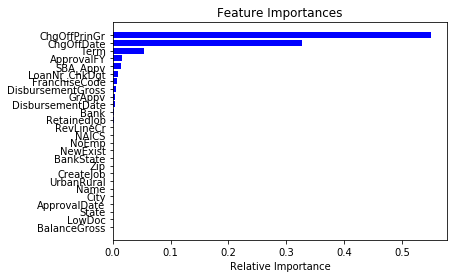

In [9]:
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


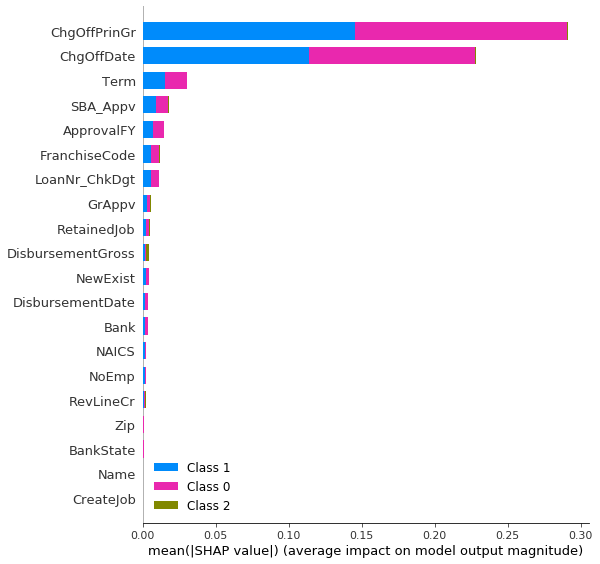

In [10]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")